<H1>Covid in Malta</H1>
Cases, vaccines and their effect on tourism and employment<br>
<br>
by Daniel Cassar Alpert<br>
M.Sc. in Artificial Intelligence 2023<br>
<br>
<b>Introduction</b><br>
- Use of Docker (setup in common between us)<br>
- Download ipynb and data files from https://github.com/dcassaralpert/Module9Discussion<br>
- COVID19-Data-master is the data provided for this task<br>
- Other Data contains other data files I sourced from: https://ec.europa.eu/eurostat/<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<H2>Covid Active Cases</H2>

We start by loading the csv dataset into a Dataframe

In [2]:
dfAggregate = pd.read_csv('./COVID19-Data-master/COVID-19 Malta - Aggregate Data Set.csv') 
dfAggregate.head()

,Date,New Cases,Total Cases,Recovered,Deaths,Active Cases
0,06/03/2020,1,1,0,0,1
1,07/03/2020,2,3,0,0,3
2,08/03/2020,0,3,0,0,3
3,09/03/2020,1,4,0,0,4
4,10/03/2020,1,5,0,0,5


In [3]:
dfAggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1027 non-null   object
 1   New Cases     1027 non-null   int64 
 2   Total Cases   1027 non-null   int64 
 3   Recovered     1027 non-null   int64 
 4   Deaths        1027 non-null   int64 
 5   Active Cases  1027 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 48.3+ KB


first thing we need to convert the date column as a date/time field. This allows us to visualise the data better and also help from some transformation later on.

dayfirst=True makes sure date is not read in american format

In [4]:
dfAggregate['Date'] = pd.to_datetime(dfAggregate['Date'], dayfirst=True)
dfAggregate.head()

,Date,New Cases,Total Cases,Recovered,Deaths,Active Cases
0,2020-03-06,1,1,0,0,1
1,2020-03-07,2,3,0,0,3
2,2020-03-08,0,3,0,0,3
3,2020-03-09,1,4,0,0,4
4,2020-03-10,1,5,0,0,5


plot the daily new active cases

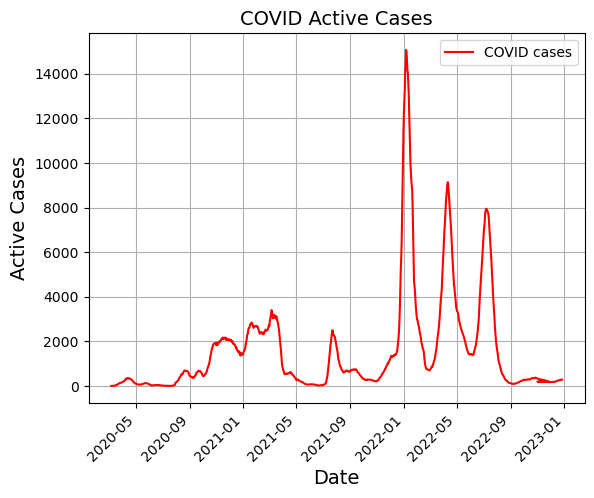

In [5]:
plt.plot(dfAggregate['Date'], dfAggregate['Active Cases'], color='red')
plt.title('COVID Active Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Active Cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['COVID cases'])
plt.show()

<H2>Covid Active Cases EU Average</H2>

Now we shall compare Malta's Covid cases with the EU average of the same period

since the data contains a list of all countires for each day, we need to group the list by Date and get the mean cases per group

In [6]:
dfCovidECDC = pd.read_csv('./Other Data/COVID ECDC.csv')
dfCovidECDC.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe


In [7]:
dfCovidECDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  28729 non-null  object 
 1   day                      28729 non-null  int64  
 2   month                    28729 non-null  int64  
 3   year                     28729 non-null  int64  
 4   cases                    28636 non-null  float64
 5   deaths                   28437 non-null  float64
 6   countriesAndTerritories  28729 non-null  object 
 7   geoId                    28729 non-null  object 
 8   countryterritoryCode     28729 non-null  object 
 9   popData2020              28729 non-null  int64  
 10  continentExp             28729 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.4+ MB


In [8]:
dfCovidECDC['Date'] = pd.to_datetime(dfCovidECDC['dateRep'], dayfirst=True)
dfCovidECDC = dfCovidECDC.groupby(['Date'])['cases'].mean().reset_index()
dfCovidECDC.head()

,Date,cases
0,2020-01-01,1.000000
1,2020-01-02,0.333333
2,2020-01-03,0.500000
3,2020-01-04,0.000000
4,2020-01-05,0.000000


In [9]:
dfCovidECDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1030 non-null   datetime64[ns]
 1   cases   1030 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.2 KB


plot the Malta-vs-EU comparison

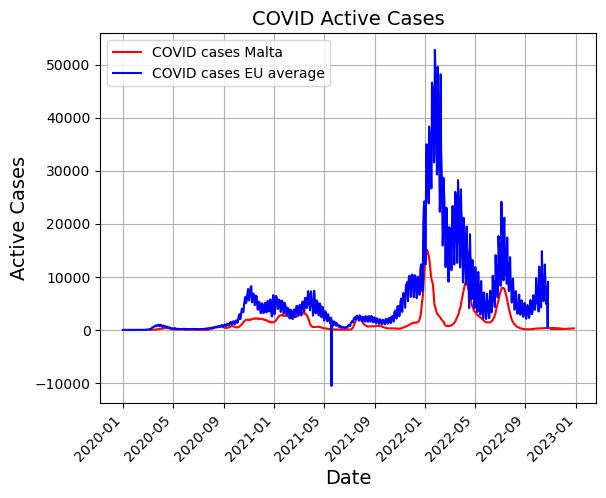

In [10]:
plt.plot(dfAggregate['Date'], dfAggregate['Active Cases'], color='red')
plt.plot(dfCovidECDC['Date'], dfCovidECDC['cases'], color='blue')
plt.title('COVID Active Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Active Cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['COVID cases Malta', 'COVID cases EU average'])
plt.show()

We need to fix the incorrect data that is showing a negative amount of active cases in the eu average data by adding a "cases>0" query

Then let's re-plot to see the updated graph

In [11]:
dfCovidECDC = dfCovidECDC.query("cases>0")
dfCovidECDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1029
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1020 non-null   datetime64[ns]
 1   cases   1020 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


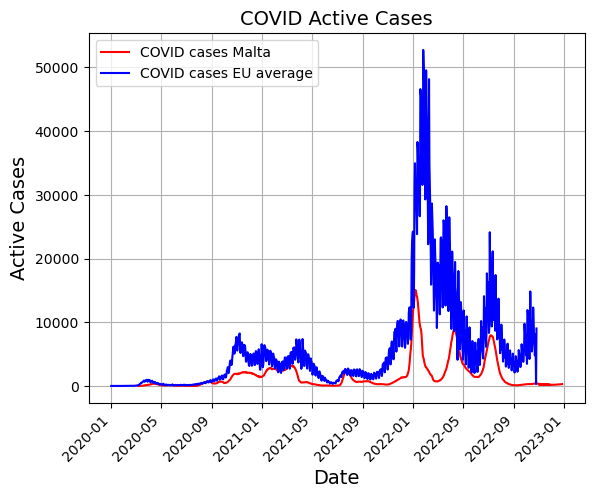

In [12]:
plt.plot(dfAggregate['Date'], dfAggregate['Active Cases'], color='red')
plt.plot(dfCovidECDC['Date'], dfCovidECDC['cases'], color='blue')
plt.title('COVID Active Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Active Cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['COVID cases Malta', 'COVID cases EU average'])
plt.show()

<H2>Covid Swab Tests</H2>

Tests dataset contains values that are null (empty). To fill these in wiith a 0 we use the fillna function. inplace=Truue will do the change in the dataframe itself without needing to output into another instance.

The dataset also contains some values with 'na' as string rather than null. These will need to be handled separately. This can be achieved by calling the replace method, replacing 'na' with 0. 

In [13]:
dfTests = pd.read_csv('./COVID19-Data-master/COVID-19 Malta - COVID Tests.csv') 
dfTests['Publication date']= pd.to_datetime(dfTests['Publication date'], dayfirst=True)

#fill na values with 0
dfTests.fillna(0, inplace=True)

#some columns contain 'na' string, replace with 0
dfTests.replace('na', 0, inplace=True)

dfTests.head()

,Publication date,NAA tests in previous day,Total NAA tests,Rapid antigen tests in previous day,Total rapid antigen tests,NAA and rapid antigen tests in previous day,Total NAA and rapid antigen tests
0,2020-07-20,583,113820,0.0,0.0,583,113820
1,2020-07-21,959,114779,0.0,0.0,959,114779
2,2020-07-22,1016,115795,0.0,0.0,1016,115795
3,2020-07-23,1114,116909,0.0,0.0,1114,116909
4,2020-07-24,931,117840,0.0,0.0,931,117840


In [14]:
dfTests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Publication date                             891 non-null    datetime64[ns]
 1   NAA tests in previous day                    891 non-null    int64         
 2   Total NAA tests                              891 non-null    int64         
 3   Rapid antigen tests in previous day          891 non-null    float64       
 4   Total rapid antigen tests                    891 non-null    float64       
 5   NAA and rapid antigen tests in previous day  891 non-null    int64         
 6   Total NAA and rapid antigen tests            891 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 48.9 KB


Now let us compare the active cases in Malta with the total number of swab-test done in the same time period

as can be seen, the pattern of the active covid cases corresponds with the number of tests that had been carried out

It can also be seen that in EU average we have a final spike in data towards the end of 2022 where in Malta this did not occur. However when we see the swab-tests data we can determine that this is because there were very minimal tests being done in this period 

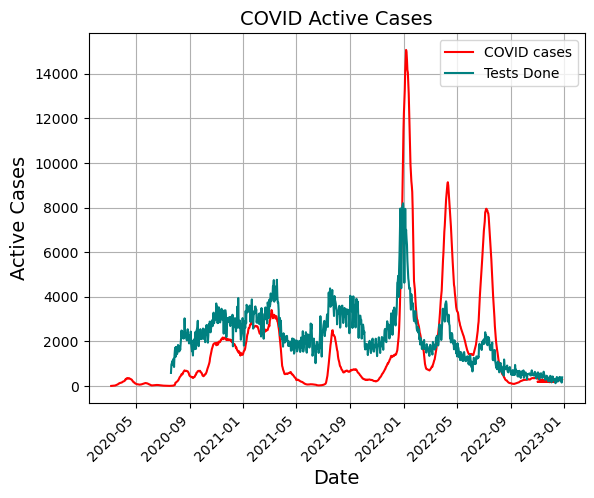

In [15]:
plt.plot(dfAggregate['Date'], dfAggregate['Active Cases'], color='red')
plt.plot(dfTests['Publication date'], dfTests['NAA and rapid antigen tests in previous day'], color='teal')
plt.title('COVID Active Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Active Cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['COVID cases', 'Tests Done'])
plt.show()

<H2>Vaccinations</H2>

Now we will be loading up the Vaccinations dataset and we give it the same treatment as with the tests dataset to fill in any null or 'na' values
but this time we will be dropping any rows with total vaccinations at 0 since this is a running total

In [16]:
dfVaccines = pd.read_csv('./COVID19-Data-master/COVID-19 Malta - Vaccination Data.csv') 
dfVaccines['Date of Vaccination']= pd.to_datetime(dfVaccines['Date of Vaccination'], dayfirst=True)

#fill na values with 0
dfVaccines.fillna(0, inplace=True)

#some columns contain 'na' string, replace with 0
dfVaccines.replace('na', 0, inplace=True)

#we need to drop rows with 0 data
dfVaccines.drop(dfVaccines[dfVaccines['Total Vaccination Doses'] == 0].index, inplace = True)

dfVaccines.head()

,Date of Vaccination,Total Vaccination Doses,Primary Vaccination,Received one dose,Total Booster doses,Total 2nd Booster doses,Omicron booster doses,Total Omicron booster doses
0,2021-01-17,11705,0.0,0,0,0,0.0,0.0
1,2021-01-18,13002,0.0,0,0,0,0.0,0.0
2,2021-01-19,14276,0.0,0,0,0,0.0,0.0
3,2021-01-20,15316,0.0,0,0,0,0.0,0.0
4,2021-01-21,16531,0.0,0,0,0,0.0,0.0


In [17]:
dfVaccines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 708
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date of Vaccination          706 non-null    datetime64[ns]
 1   Total Vaccination Doses      706 non-null    object        
 2   Primary Vaccination          706 non-null    float64       
 3   Received one dose            706 non-null    object        
 4   Total Booster doses          706 non-null    object        
 5   Total 2nd Booster doses      706 non-null    object        
 6   Omicron booster doses        706 non-null    float64       
 7   Total Omicron booster doses  706 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 49.6+ KB


Plotting the total vaccination doses gives us a straight diagonal line so won't be of much help to find any patterns

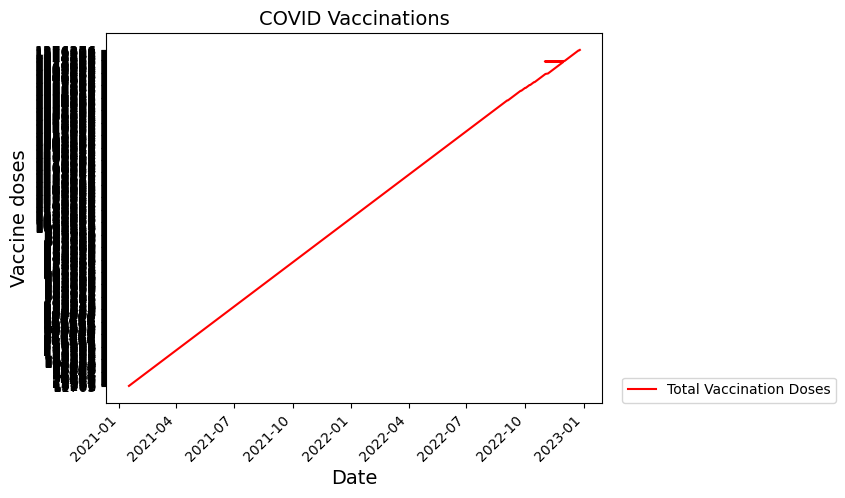

In [18]:
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Vaccination Doses'], color='red')
plt.title('COVID Vaccinations', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccine doses', fontsize=14)
plt.legend(['Total Vaccination Doses'], loc=(1.04, 0))
plt.grid(False)
plt.xticks(rotation=45, ha="right")
plt.show()

Instead we shall concentrate on the separate vaccination records (leaving out the total value) and colour-code them to be easier to view

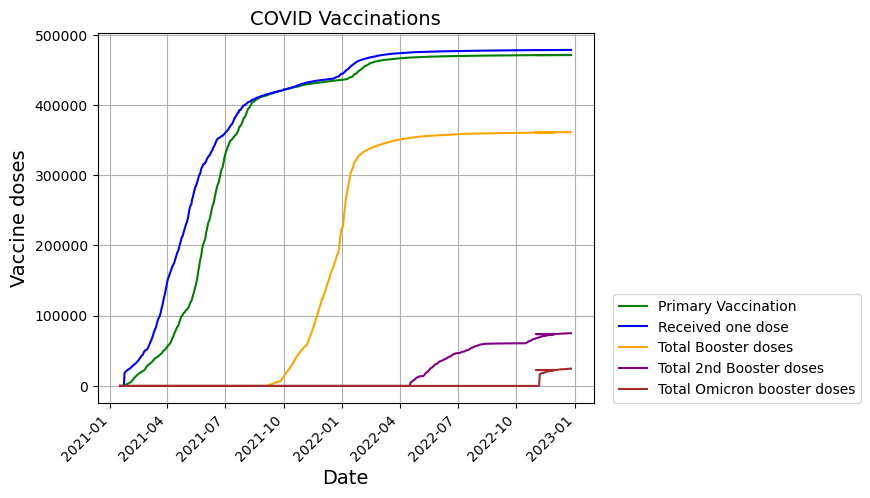

In [19]:
#plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Vaccination Doses'], color='red')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Primary Vaccination'], color='green')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Received one dose'], color='blue')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Booster doses'], color='orange')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total 2nd Booster doses'], color='purple')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Omicron booster doses'], color='brown')
plt.title('COVID Vaccinations', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccine doses', fontsize=14)
plt.legend(['Primary Vaccination', 'Received one dose', 'Total Booster doses', 'Total 2nd Booster doses', 'Total Omicron booster doses'], loc=(1.04, 0))
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.show()

Now lets plot the covid active cases onto the vaccination data to see if there's any correlation between them

We can see that we have a problem because of the size of teh values in which the Active Cases values are relatively small when compared to the vaccinations.

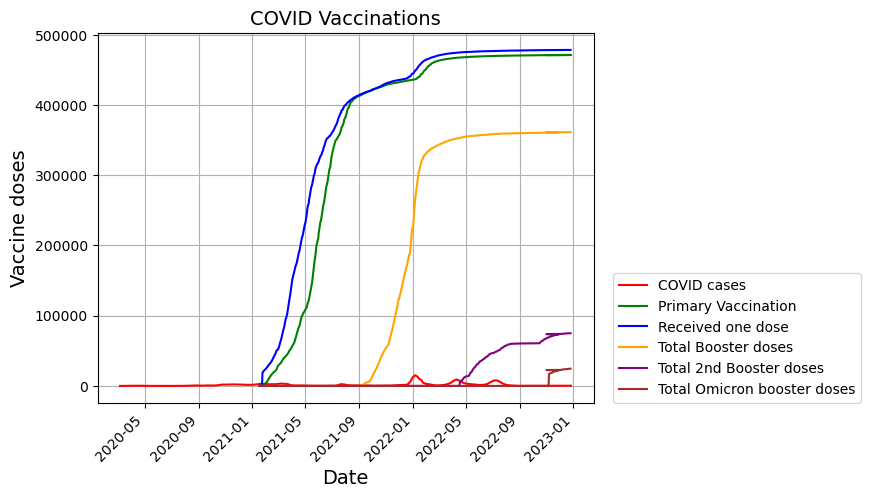

In [20]:
plt.plot(dfAggregate['Date'], dfAggregate['Active Cases'], color='red')
#plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Vaccination Doses'], color='red')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Primary Vaccination'], color='green')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Received one dose'], color='blue')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Booster doses'], color='orange')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total 2nd Booster doses'], color='purple')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Omicron booster doses'], color='brown')
plt.title('COVID Vaccinations', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccine doses', fontsize=14)
plt.legend(['COVID cases', 'Primary Vaccination', 'Received one dose', 'Total Booster doses', 'Total 2nd Booster doses', 'Total Omicron booster doses'], loc=(1.04, 0))
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.show()

To be able to properly compare visually, we need to enlarge the active cases. 

Not to modify the actual active cases values, we will add a new field that contains the active cases multiplied by 30

Now we can see that the vaccinations started with the biggest surge in covid between 2019 and 2021<br>
Just after vaccinations started, the cases went significantly down for a few months<br>
The booster shot then also corresponds to the biggest spike in Covid which happened at 01-2022, and then the second booster shot corresponds with the next spike 

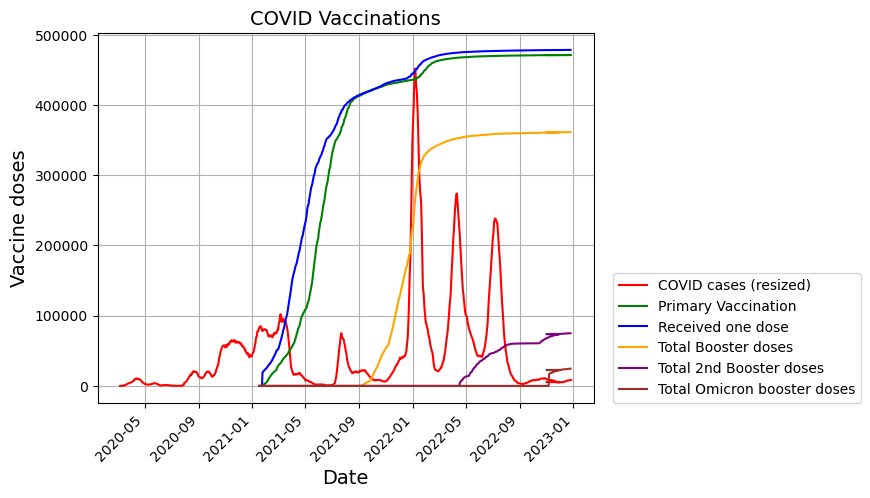

In [21]:
#lets enlarge the covid cases in order to be more visible on the vaccines plot
dfAggregate['Active Cases large'] = dfAggregate['Active Cases'] * 30

plt.plot(dfAggregate['Date'], dfAggregate['Active Cases large'], color='red')
#plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Vaccination Doses'], color='red')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Primary Vaccination'], color='green')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Received one dose'], color='blue')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Booster doses'], color='orange')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total 2nd Booster doses'], color='purple')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Omicron booster doses'], color='brown')
plt.title('COVID Vaccinations', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccine doses', fontsize=14)
plt.legend(['COVID cases (resized)', 'Primary Vaccination', 'Received one dose', 'Total Booster doses', 'Total 2nd Booster doses', 'Total Omicron booster doses'], loc=(1.04, 0))
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.show()

<H2>Air Passengers</H2>

We will now load up data related to air traffic passengers

The dataset contains all EU countries and different measurement values

We therefore need to filter the list to only get the data related to Malta (geo == 'MT') and Passengers on board (tra_meas == 'PAS_BRD')

In [22]:
dfairpassengers = pd.read_csv('./Other Data/air passengers.csv') 
dfairpassengers.head()

,DATAFLOW,LAST UPDATE,freq,unit,tra_meas,tra_cov,schedule,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,AT,2020-01,2566227,NaN
1,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,AT,2020-02,2538497,NaN
2,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,AT,2020-03,1008837,NaN
3,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,AT,2020-04,12978,NaN
4,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,AT,2020-05,21487,NaN


In [23]:
dfairpassengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     6714 non-null   object 
 1   LAST UPDATE  6714 non-null   object 
 2   freq         6714 non-null   object 
 3   unit         6714 non-null   object 
 4   tra_meas     6714 non-null   object 
 5   tra_cov      6714 non-null   object 
 6   schedule     6714 non-null   object 
 7   geo          6714 non-null   object 
 8   TIME_PERIOD  6714 non-null   object 
 9   OBS_VALUE    6714 non-null   int64  
 10  OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 577.1+ KB


In [24]:
dfairpassengers = dfairpassengers.query("geo == 'MT'")
dfairpassengers = dfairpassengers.query("tra_meas == 'PAS_BRD'")
dfairpassengers.head()

,DATAFLOW,LAST UPDATE,freq,unit,tra_meas,tra_cov,schedule,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
778,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-01,418579,NaN
779,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-02,422129,NaN
780,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-03,169584,NaN
781,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-04,2355,NaN
782,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-05,3220,NaN


In [25]:
dfairpassengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 778 to 807
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     30 non-null     object 
 1   LAST UPDATE  30 non-null     object 
 2   freq         30 non-null     object 
 3   unit         30 non-null     object 
 4   tra_meas     30 non-null     object 
 5   tra_cov      30 non-null     object 
 6   schedule     30 non-null     object 
 7   geo          30 non-null     object 
 8   TIME_PERIOD  30 non-null     object 
 9   OBS_VALUE    30 non-null     int64  
 10  OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 2.8+ KB


As it is the 'TIME_PERIOD' is not in date format so cannot be used to compare to the other datasets.

pd.to_datetime manages to convert these monthly entries into a date (set to the first day of the month). We store this into a new column for Date

In [26]:
dfairpassengers['Date']= pd.to_datetime(dfairpassengers['TIME_PERIOD'])
dfairpassengers.head()

,DATAFLOW,LAST UPDATE,freq,unit,tra_meas,tra_cov,schedule,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Date
778,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-01,418579,NaN,2020-01-01
779,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-02,422129,NaN,2020-02-01
780,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-03,169584,NaN,2020-03-01
781,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-04,2355,NaN,2020-04-01
782,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-05,3220,NaN,2020-05-01


Since monthly data generally refers to the situation at the end of the particular month rather than the beginning, <br>
we need to change the dates so that they refer to the end of the month instead (this can be done using pd.offsets.MonthEnd function)

In [27]:
dfairpassengers['Date'] = dfairpassengers['Date'] + pd.offsets.MonthEnd(0)
dfairpassengers.head()

,DATAFLOW,LAST UPDATE,freq,unit,tra_meas,tra_cov,schedule,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Date
778,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-01,418579,NaN,2020-01-31
779,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-02,422129,NaN,2020-02-29
780,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-03,169584,NaN,2020-03-31
781,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-04,2355,NaN,2020-04-30
782,ESTAT:AVIA_PAOC(1.0),05/12/22 23:00:00,M,PAS,PAS_BRD,TOTAL,TOT,MT,2020-05,3220,NaN,2020-05-31


we set the index to the new date column. This will sort the data on this column and also use it as the first plotting value by default

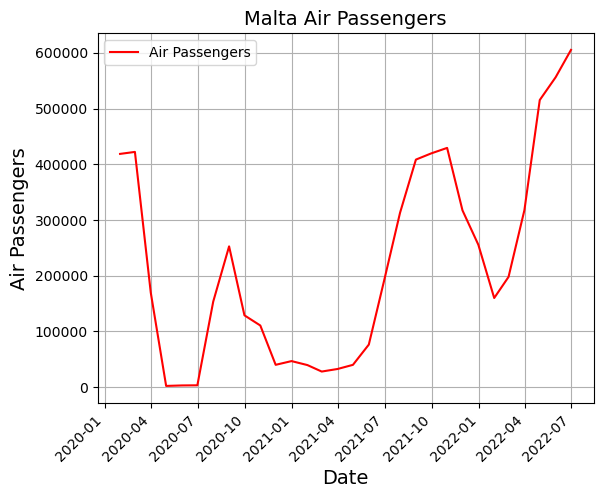

In [28]:
dfairpassengers.set_index('Date', inplace=True)

plt.plot(dfairpassengers['OBS_VALUE'], color='red')
plt.title('Malta Air Passengers', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Air Passengers', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['Air Passengers'])
plt.show()

<H2>Hotel Stays</H2>

We will now load up data related to Hotel Stays

The dataset contains all EU countries and different measurement values

We therefore need to filter the list to only get the data related to Malta (geo == 'MT'), total Country of residence (c_resid == 'TOTAL'), 'number' as unit of measure (unit == 'NR') and Statistical classification to 'Hotels and similar accommodation' (nace_r2 == 'I551')

We also do the same to convert the TIME_PERIOD value into end-of-month date

In [29]:
dfhotelstays = pd.read_csv('./Other Data/hotel stays.csv') 
dfhotelstays.head()

,DATAFLOW,LAST UPDATE,freq,c_resid,unit,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,DOM,NR,I551,AL,2020-01,60376.0,e
1,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,DOM,NR,I551,AL,2020-02,34490.0,e
2,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,DOM,NR,I551,AL,2020-03,9168.0,e
3,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,DOM,NR,I551,AL,2020-04,0.0,e
4,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,DOM,NR,I551,AL,2020-05,32902.0,e


In [30]:
dfhotelstays = dfhotelstays.query("geo == 'MT'")
dfhotelstays = dfhotelstays.query("c_resid == 'TOTAL'")
dfhotelstays = dfhotelstays.query("unit == 'NR'")
dfhotelstays = dfhotelstays.query("nace_r2 == 'I551'")
dfhotelstays['Date']= pd.to_datetime(dfhotelstays['TIME_PERIOD'])
dfhotelstays['Date'] = dfhotelstays['Date'] + pd.offsets.MonthEnd(0)
dfhotelstays.head()

,DATAFLOW,LAST UPDATE,freq,c_resid,unit,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Date
38542,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,TOTAL,NR,I551,MT,2020-01,481504.0,NaN,2020-01-31
38543,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,TOTAL,NR,I551,MT,2020-02,572671.0,NaN,2020-02-29
38544,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,TOTAL,NR,I551,MT,2020-03,236340.0,NaN,2020-03-31
38545,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,TOTAL,NR,I551,MT,2020-04,8840.0,NaN,2020-04-30
38546,ESTAT:TOUR_OCC_NIM(1.0),21/12/22 23:00:00,M,TOTAL,NR,I551,MT,2020-05,10763.0,NaN,2020-05-31


In [31]:
dfhotelstays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 38542 to 38575
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATAFLOW     34 non-null     object        
 1   LAST UPDATE  34 non-null     object        
 2   freq         34 non-null     object        
 3   c_resid      34 non-null     object        
 4   unit         34 non-null     object        
 5   nace_r2      34 non-null     object        
 6   geo          34 non-null     object        
 7   TIME_PERIOD  34 non-null     object        
 8   OBS_VALUE    34 non-null     float64       
 9   OBS_FLAG     0 non-null      object        
 10  Date         34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 3.2+ KB


As one can see, september is always the highest value for each year in 2020, 2021 and 2022 but was close to 0 in May 2020

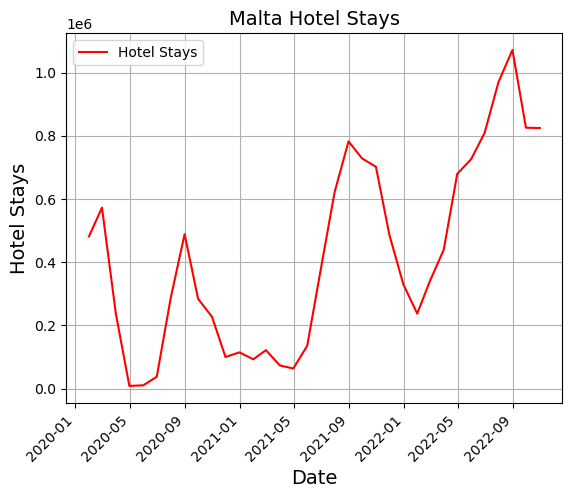

In [32]:
dfhotelstays.set_index('Date', inplace=True)

plt.plot(dfhotelstays['OBS_VALUE'], color='red')
plt.title('Malta Hotel Stays', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Hotel Stays', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['Hotel Stays'])
plt.show()

<H2>Convert Covid Active Cases to Monthly Values</H2>

To now be able to compare this data which is in monthly format to the covid cases dataset which was in daily amounts, we will need to convert the covid cases into monthly data too. 

To do this, once we set the index to the date column, we can use the 'resample' function with the 'M' parameter to specify monthly and set it to sum the remainig values in order to get the total new cases per month

In [33]:
dfAggregate.set_index('Date', inplace=True)
dfAggregateM = dfAggregate.resample('M').sum()

dfAggregateM.head

<bound method NDFrame.head of             New Cases  Total Cases  Recovered  Deaths  Active Cases  \
Date                                                                  
2020-03-31        169         1727         36       0          1691   
2020-04-30        296        11098       3331      71          7696   
2020-05-31        153        16920      13940     180          2800   
2020-06-30         52        19477      18140     270          1065   
2020-07-31        154        21345      20446     279           620   
2020-08-31       1164        41914      26260     293         15361   
2020-09-30       1175        74643      58537     587         15519   
2020-10-31       2984       137553      99499    1426         36628   
2020-11-30       3831       242409     177896    2909         61604   
2020-12-31       2901       352991     294553    5572         52878   
2021-01-31       5129       476588     394624    7450         74514   
2021-02-28       4579       559054     481564  

If we now plot this resampled data we can see that we have maintained the same overall plot however it is slightly less detailed which sharper turns

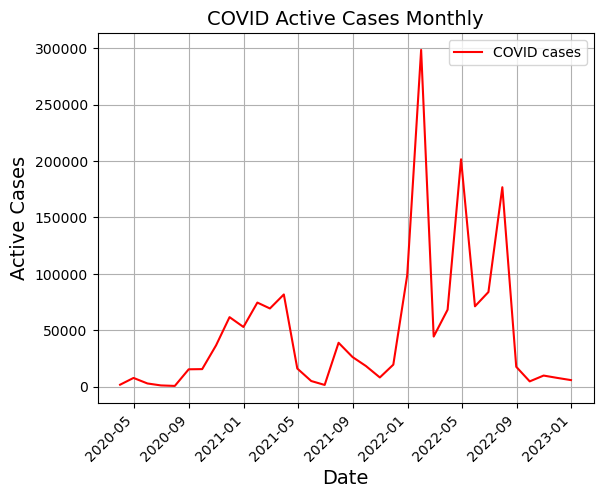

In [34]:
plt.plot( dfAggregateM['Active Cases'], color='red')
plt.title('COVID Active Cases Monthly', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Active Cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['COVID cases'])
plt.show()

<H2>Covid Active Cases / Hotel Stays / Air Passengers</H2>

If we now compare the air passengers and hotel stays to the covid cases we can start to see a pattern emerge

For better visualisation of the covid cases on the air passengers/hotel stays plot, let multiply the covid cases by 2. 

This makes it more evident to see the link between the rise in covid cases with reduced air passengers and hotel stays

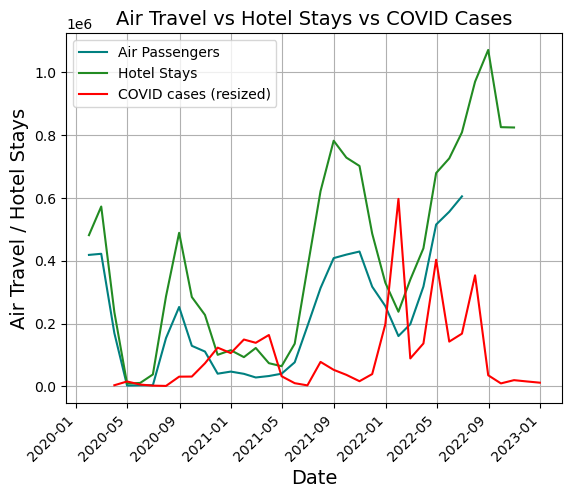

In [35]:
plt.plot(dfairpassengers['OBS_VALUE'], color='teal')
plt.plot(dfhotelstays['OBS_VALUE'], color='forestgreen')
plt.plot(dfAggregateM['Active Cases']*2, color='red')

plt.title('Air Travel vs Hotel Stays vs COVID Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Air Travel / Hotel Stays', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['Air Passengers', 'Hotel Stays', 'COVID cases (resized)'])
plt.show()

<H2>Enter Booster shot</H2>

One interesting observation here is that after the biggest spike in covid cases in the beginning of 2022 which greatly reduced air passengers and hotel stays, there were 2 more spikes that only affected them a minimal amount.

If we add in the booster vaccination data that we had extracted before, we will notice that these started to be administered right at the start of the biggest spike and reached a plateu at the same time of the second spike. This means that by then most people had gotten the booster shot and covid cases did not deter them from travelling any longer

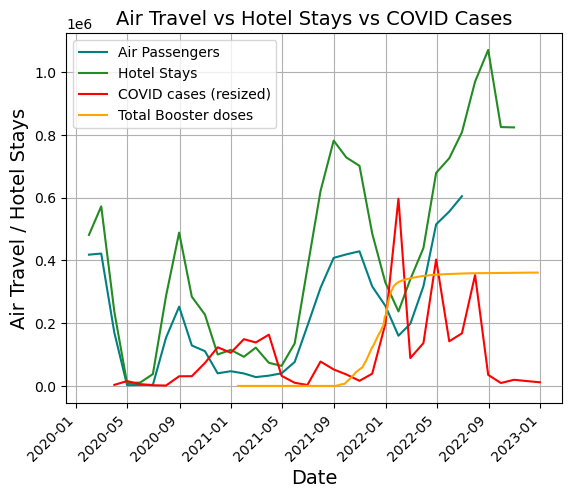

In [36]:
plt.plot(dfairpassengers['OBS_VALUE'], color='teal')
plt.plot(dfhotelstays['OBS_VALUE'], color='forestgreen')
plt.plot(dfAggregateM['Active Cases']*2, color='red')
plt.plot(dfVaccines['Date of Vaccination'], dfVaccines['Total Booster doses'], color='orange')

plt.title('Air Travel vs Hotel Stays vs COVID Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Air Travel / Hotel Stays', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['Air Passengers', 'Hotel Stays', 'COVID cases (resized)', 'Total Booster doses'])
plt.show()

<H2>Malta Unemployment Rate</H2>

The reduced rate in tourism must have affected employment in Malta since it is so dependant on it. 

Lets load up Malta's unemployment rate dataset and give it similar treatment as the other datasets

In [37]:
dfunemployment = pd.read_csv('./Other Data/unemployment rates.csv') 
dfunemployment.head()

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,AT,2019-01,4.9,NaN
1,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,AT,2019-02,5.1,NaN
2,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,AT,2019-03,5.0,NaN
3,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,AT,2019-04,5.0,NaN
4,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,AT,2019-05,4.9,NaN


In [38]:
dfunemployment = dfunemployment.query("geo == 'MT'")
dfunemployment['Date']= pd.to_datetime(dfunemployment['TIME_PERIOD'])
dfunemployment['Date'] = dfunemployment['Date'] + pd.offsets.MonthEnd(0)
dfunemployment.set_index('Date', inplace=True)
dfunemployment.head()

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
Date,,,,,,,,,,
2019-01-31,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,MT,2019-01,3.7,NaN
2019-02-28,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,MT,2019-02,3.9,NaN
2019-03-31,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,MT,2019-03,3.8,NaN
2019-04-30,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,MT,2019-04,3.8,NaN
2019-05-31,ESTAT:EI_LMHR_M(1.0),20/12/22 11:00:00,M,PC_ACT,SA,LM-UN-T-TOT,MT,2019-05,3.6,NaN


In [39]:
dfunemployment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2019-01-31 to 2022-10-31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     46 non-null     object 
 1   LAST UPDATE  46 non-null     object 
 2   freq         46 non-null     object 
 3   unit         46 non-null     object 
 4   s_adj        46 non-null     object 
 5   indic        46 non-null     object 
 6   geo          46 non-null     object 
 7   TIME_PERIOD  46 non-null     object 
 8   OBS_VALUE    46 non-null     float64
 9   OBS_FLAG     0 non-null      object 
dtypes: float64(1), object(9)
memory usage: 4.0+ KB


plotting the unemployment rate against the active cases (which needs to be greatly resized to be visible) shows that unemployment rate increased as soon as covid cases started increasing in 2020 but then decreased as time passed and never increased again. 

This might suggest that;

- People who lost their job found a job in a sector that is not affected by tourism

- Or that the Wage Supplement that the government introduced in March-June 2020 had a positive effect on unemployment

- Or.. simply that, that period was the only time where air traffic and hotel stays reached 0

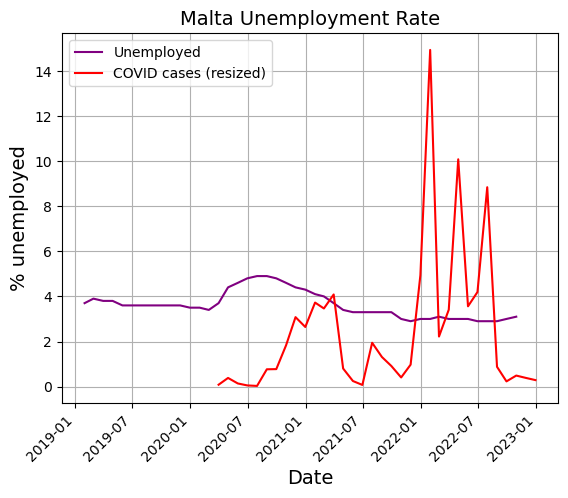

In [40]:
plt.plot(dfunemployment['OBS_VALUE'], color='purple')
plt.plot(dfAggregateM['Active Cases']/20000, color='red')
plt.title('Malta Unemployment Rate', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% unemployed', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['Unemployed', 'COVID cases (resized)'])
plt.show()

finally lets also add the plot for the air passengers and hotel stays to this data

here we can also see that the unemployment rate increased right when air passengers and hotel stays hit 0, later on in the time-period this never went down to 0 again which would mean that businesses would have been effected slightly less even though there were increased covid cases.

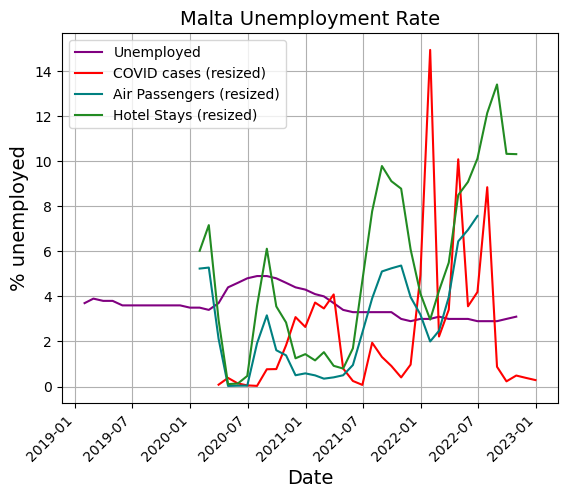

In [41]:
plt.plot(dfunemployment['OBS_VALUE'], color='purple')
plt.plot(dfAggregateM['Active Cases']/20000, color='red')
plt.plot(dfairpassengers['OBS_VALUE']/80000, color='teal')
plt.plot(dfhotelstays['OBS_VALUE']/80000, color='forestgreen')

plt.title('Malta Unemployment Rate', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% unemployed', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.legend(['Unemployed', 'COVID cases (resized)', 'Air Passengers (resized)', 'Hotel Stays (resized)'])
plt.show()